# Variance

Finding the mean, median, and mode of a dataset is a good way to start getting an understanding of the general shape of your data

However, those three descriptive statistics only tell part of the story. Consider the two datasets below:

    dataset_one = [-4, -2, 0, 2, 4]
    dataset_two = [-400, -200, 0, 200, 400]
    
These two datasets have the same mean and median — both of those values happen to be 0. If we only reported these two statistics, we would not be communicating any meaninful difference between these two datasets.

This is where variance comes into play. Variance is a descriptive statistic that describes how spread out the points in a data set are.

Teacher One mean: 84.46766666666666
Teacher Two mean: 84.298


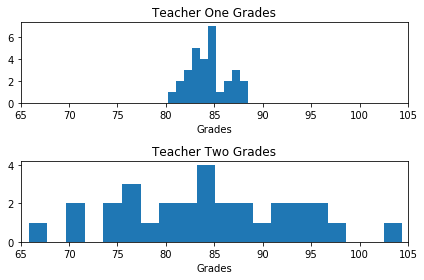

In [3]:
import numpy as np
import matplotlib.pyplot as plt


teacher_one_grades = [83.42, 88.04, 82.12, 85.02, 82.52, 87.47, 84.69, 85.18, 86.29, 85.53, 81.29, 82.54, 83.47, 83.91, 86.83, 88.5, 84.95, 83.79, 84.74, 84.03, 87.62, 81.15, 83.45, 80.24, 82.76, 83.98, 84.95, 83.37, 84.89, 87.29]
teacher_two_grades = [85.15, 95.64, 84.73, 71.46, 95.99, 81.61, 86.55, 79.81, 77.06, 92.86, 83.67, 73.63, 90.12, 80.64, 78.46, 76.86, 104.4, 88.53, 74.62, 91.27, 76.53, 94.37, 84.74, 81.84, 97.69, 70.77, 84.44, 88.06, 91.62, 65.82]

print("Teacher One mean: " + str(np.mean(teacher_one_grades)))
print("Teacher Two mean: " + str(np.mean(teacher_two_grades)))

plt.subplot(2,1,1)
plt.title("Teacher One Grades")
plt.xlabel("Grades")
plt.hist(teacher_one_grades)
plt.xlim(65, 105)


plt.subplot(2,1,2)
plt.title("Teacher Two Grades")
plt.xlabel("Grades")
plt.hist(teacher_two_grades, bins = 20)
plt.xlim(65, 105)

plt.tight_layout()
plt.show()


# Distance From Mean

Now that you have learned the importance of describing the spread of a dataset, let’s figure out how to mathematically compute this number.

How would you attempt to capture the spread of the data in a single number?

Let’s start with our intuition — we want the variance of a dataset to be a large number if the data is spread out, and a small number if the data is close together.

<img src='images/two_histograms.svg' height=400>

Two histograms. One with a large spread and one with a smaller spread.
A lot of people may initially consider using the range of the data. But that only considers two points in your entire dataset. Instead, we can include every point in our calculation by finding the difference between every data point and the mean.

<img src='images/difference.svg' height=400>

The difference between the mean and four different points.
If the data is close together, then each data point will tend to be close to the mean, and the difference will be small. If the data is spread out, the difference between every data point and the mean will be larger.

Mathematically, we can write this comparison as

$\text{difference} = X - \mu$

Where X is a single data point and the Greek letter mu is the mean.

In [4]:
import numpy as np

grades = [88, 82, 85, 84, 90]
mean = np.mean(grades)

difference_one = grades[0]- mean
difference_two = grades[1]- mean
difference_three = grades[2]- mean
difference_four = grades[3]- mean
difference_five = grades[4]- mean


# IGNORE CODE BELOW HERE
print("The mean of the data set is " + str(mean) + "\n")
print("The first student is " +str(round(difference_one, 2)) + " percentage points away from the mean.")
print("The second student is " +str(round(difference_two, 2)) + " percentage points away from the mean.")
print("The third student is " +str(round(difference_three, 2)) + " percentage points away from the mean.")
print("The fourth student is " +str(round(difference_four, 2)) + " percentage points away from the mean.")
print("The fifth student is " +str(round(difference_five, 2)) + " percentage points away from the mean.")

The mean of the data set is 85.8

The first student is 2.2 percentage points away from the mean.
The second student is -3.8 percentage points away from the mean.
The third student is -0.8 percentage points away from the mean.
The fourth student is -1.8 percentage points away from the mean.
The fifth student is 4.2 percentage points away from the mean.


# Average Distances
We now have five different values that describe how far away each point is from the mean. That seems to be a good start in describing the spread of the data. But the whole point of calculating variance was to get one number that describes the dataset. We don’t want to report five values — we want to combine those into one descriptive statistic.

To do this, we’ll take the average of those five numbers. By adding those numbers together and dividing by 5, we’ll end up with a single number that describes the average distance between our data points and the mean.

Note that we’re not quite done yet — our final answer is going to look a bit strange here. There’s a small problem that we’ll fix in the next exercise.

In [5]:
import numpy as np

grades = [88, 82, 85, 84, 90]
mean = np.mean(grades)

difference_one = 88 - mean
difference_two = 82 - mean
difference_three = 85 - mean
difference_four = 84 - mean
difference_five = 90 - mean

#Part 1: Sum the differences
difference_sum = difference_one + difference_two + difference_three + difference_four + difference_five

#Part 2: Average the differences
average_difference = difference_sum / 5

#IGNORE CODE BELOW HERE
print("The sum of the differences is " + str(format(difference_sum, ".16f")))
print("The average difference is " + str(format(average_difference, ".16f")))

The sum of the differences is 0.0000000000000142
The average difference is 0.0000000000000028


# Square The Differences

We’re almost there! We have one small problem with our equation. Consider this very small dataset:

    [-5, 5]
    
The mean of this dataset is 0, so when we find the difference between each point and the mean we get -5 - 0 = -5 and 5 - 0 = 5.

When we take the average of -5 and 5 to get the variance, we get 0!

Now think about what would happen if the dataset were [-200, 200]. We’d get the same result! That can’t possibly be right — the dataset with 200 is much more spread out than the dataset with 5, so the variance should be much larger!

The problem here is with negative numbers. Because one of our data points was 5 units below the mean and the other was 5 units above the mean, they canceled each other out!

When calculating variance, we don’t care if a data point was above or below the mean — all we care about is how far away it was. To get rid of those pesky negative numbers, we’ll square the difference between each data point and the mean.

Our equation for finding the difference between a data point and the mean now looks like this:

$\text{difference} = (X - \mu)^2$ 

In [6]:
import numpy as np

grades = [88, 82, 85, 84, 90]
mean = np.mean(grades)

#When calculating these variables, square the difference.
difference_one = (88 - mean)**2
difference_two = (82 - mean)**2
difference_three = (85 - mean)**2
difference_four = (84 - mean)**2
difference_five = (90 - mean)**2

difference_sum = difference_one + difference_two + difference_three + difference_four + difference_five

variance = difference_sum / 5

print("The sum of the squared differences is " + str(difference_sum))
print("The variance is " + str(variance))

The sum of the squared differences is 40.8
The variance is 8.16


Variance In NumPy
Well done! You’ve calculated the variance of a data set. The full equation for the variance is as follows:

$\sigma^2 = \frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}$ 
 
Let’s dissect this equation a bit.

Variance is usually represented by the symbol sigma squared.
We start by taking every point in the dataset — from point number 1 to point number N — and finding the difference between that point and the mean.
Next, we square each difference to make all differences positive.
Finally, we average those squared differences by adding them together and dividing by N, the total number of points in the dataset.
All of this work can be done quickly using Python’s NumPy library. The var() function takes a list of numbers as a parameter and returns the variance of that dataset.

    import numpy as np

    dataset = [3, 5, -2, 49, 10]
    variance = np.var(dataset)

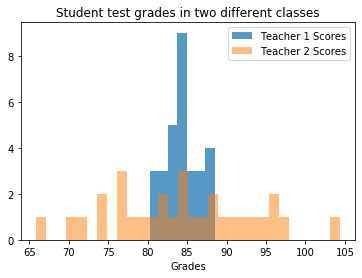

The mean of the test scores in teacher one's class is 84.46766666666666
The mean of the test scores in teacher two's class is 84.29799999999999
The variance of the test scores in teacher one's class is 4.266517888888889
The variance of the test scores in teacher two's class is 78.13198933333337


In [8]:
import numpy as np
import matplotlib.pyplot as plt


teacher_one_grades = [80.24, 81.15, 81.29, 82.12, 82.52, 82.54, 82.76, 83.37, 83.42, 83.45, 83.47, 83.79, 83.91, 83.98, 84.03, 84.69, 84.74, 84.89, 84.95, 84.95, 85.02, 85.18, 85.53, 86.29, 86.83, 87.29, 87.47, 87.62, 88.04, 88.5]
teacher_two_grades = [65.82, 70.77, 71.46, 73.63, 74.62, 76.53, 76.86, 77.06, 78.46, 79.81, 80.64, 81.61, 81.84, 83.67, 84.44, 84.73, 84.74, 85.15, 86.55, 88.06, 88.53, 90.12, 91.27, 91.62, 92.86, 94.37, 95.64, 95.99, 97.69, 104.4]

#Set these two variables equal to the variance of each dataset using NumPy
teacher_one_variance = np.var(teacher_one_grades)
teacher_two_variance = np.var(teacher_two_grades)


#IGNORE THE CODE BELOW HERE
plt.hist(teacher_one_grades, alpha = 0.75, label = "Teacher 1 Scores", bins = 7)
plt.hist(teacher_two_grades, alpha = 0.5, label = "Teacher 2 Scores", bins = 30)
plt.title("Student test grades in two different classes")
plt.xlabel("Grades")
plt.legend()
plt.show()

print("The mean of the test scores in teacher one's class is " + str(np.mean(teacher_one_grades)))
print("The mean of the test scores in teacher two's class is " + str(np.mean(teacher_two_grades)))

print("The variance of the test scores in teacher one's class is " +str(teacher_one_variance))
print("The variance of the test scores in teacher two's class is " +str(teacher_two_variance))


# Review

Great work! In this lesson you’ve learned about variance and how to calculate it.

In the example used in this lesson, the importance of variance was highlighted by showing data from test scores in classes taught by two different teachers. What story does variance tell? What conclusions can we draw from this statistic?

<img src='images/teachers.png' height=400>

The histogram of scores from two different teacher's classes
In the class with low variance, it seems like the teacher strives to make sure all students have a firm understanding of the subject, but nobody is exemplary.

In the class with high variance, the teacher might focus more of their attention on certain students. This might enable some students to ace their tests, but other students get left behind.

If we only looked at statistics like mean, median, and mode, these nuances in the data wouldn’t be represented.

In [9]:
dataset_one = [-1.00271051e+01,  2.44056436e+00,  2.94492779e+00,  2.30809322e+01,
        1.44228252e+01, -6.62170391e+00, -5.84145412e+00, -5.82085113e+00,
       -6.23441951e+00,  4.89589152e+00,  5.53333473e+00,  8.13436224e-01,
        8.31733744e+00,  1.26817491e+01,  1.63690746e+01,  9.27975035e+00,
        3.38153801e-01, -2.08387710e+00, -3.41709471e+00, -1.16798232e+01,
       -1.27378389e+01, -1.04388072e+01,  3.04246862e+00, -1.95272242e+01,
        1.28730457e+01,  2.16461123e+01, -5.36036891e+00,  7.62597179e+00,
       -5.26893421e+00, -2.14136511e+00,  1.21484045e+00, -1.46287517e+01,
        5.55387760e+00, -1.27708511e+01, -8.77405168e+00,  3.03872494e+00,
        1.69469922e+01, -7.75303856e+00,  4.38781565e+00,  1.22995899e+00,
       -1.53206965e+01,  4.41561196e+00,  5.25609049e+00,  7.84277699e+00,
       -2.07648488e+01,  1.06480808e+01,  4.58888574e+00,  9.91680236e+00,
        1.89070643e+01, -2.19369193e+01, -1.68046317e+01,  7.98651903e+00,
        8.70712472e+00,  1.53906517e+01, -5.06645423e+00,  1.21229692e+01,
       -6.89022105e+00, -1.89235490e+00,  1.05736281e+01, -3.34405734e-01,
        9.18688220e+00, -5.28673711e+00, -6.96617094e+00, -2.93475354e+00,
       -4.11820660e+00,  6.42745765e+00,  2.35309576e+00, -6.18181195e+00,
        1.89856474e+01,  1.59507619e+01,  1.48997068e+01, -9.45567486e+00,
       -8.65923566e-01,  6.58553224e+00, -7.19112835e+00,  7.94435228e+00,
        7.80545934e+00,  1.32741447e+01, -6.36203259e+00, -5.97402732e-01,
        1.41425808e+01, -9.88711845e+00, -2.56723609e+01, -3.53122817e+00,
       -3.35992879e+00,  2.52457751e+01, -1.14729375e+01,  3.29799035e+00,
        3.61372888e+00, -1.34757379e+01,  1.57199355e+01,  1.16738057e+01,
       -8.46912595e+00, -9.94020992e-01, -7.62195108e+00, -1.58112435e+01,
       -6.11703783e+00,  1.91273643e+01, -2.97716951e+00, -1.59703952e+01,
       -2.47215710e+00,  2.68675569e-01,  2.51171550e+01, -4.76331016e+00,
       -1.46726833e+01,  1.40317129e+01, -3.82659938e-01,  3.18227889e+00,
       -1.76638891e+01, -2.23390103e+00,  8.03838894e-01,  6.67611722e+00,
       -1.64902139e+00,  5.16742707e+00, -1.52248250e+01,  1.21547485e+01,
       -7.63311657e+00,  1.09871453e+01, -1.37862013e+00,  2.55144651e+01,
       -1.51431679e+00, -7.30840019e+00,  2.14850396e+01, -2.38610237e+01,
        1.59614887e+01, -1.35501679e+01,  1.19346760e+01,  7.87909561e+00,
       -2.31891764e+00,  1.33466581e+01,  9.43822950e+00, -2.78843356e+00,
        1.06501154e+00,  9.62415715e+00, -1.42182422e+01, -1.20659874e+01,
       -4.46565612e-02, -1.25939923e+01, -9.58473020e+00,  1.53957060e+01,
       -9.52262657e+00,  2.76362127e+00, -1.71650925e-01, -1.73972407e+01,
       -2.79329394e+00,  6.56918883e+00,  1.89830025e+01, -6.77696679e+00,
        5.91484218e+00,  5.39165239e+00,  1.32198781e+01,  3.87114403e+00,
       -1.48986640e+01, -1.47566325e+01,  2.02663507e+01,  1.54087490e+01,
       -5.81149983e+00,  1.86805163e+01,  3.78225084e+00, -9.12508124e+00,
       -1.73796803e+01,  1.36587933e+01, -1.46087181e+01,  2.97667538e+00,
        1.11217091e+01,  7.20572710e+00,  5.55445139e+00,  4.33888556e+00,
        1.61314695e+01,  4.90812689e+00,  1.70667051e-01, -9.05775142e+00,
        1.04576939e+01,  1.17630929e+01, -1.14281811e+00,  8.09986292e+00,
        2.47784977e+01, -2.74775064e+00,  1.17933710e+01,  6.60244794e+00,
        6.60722780e+00,  2.95871213e+00,  1.61326239e+01, -1.38411266e+01,
       -4.90393228e-01,  1.45098476e+01, -9.63981447e-01, -6.15608177e+00,
       -1.48120973e+01, -1.03689828e+00,  1.08325190e+01, -1.76544252e+01,
        8.41791411e+00,  1.04969722e+01, -1.17403874e+01, -6.07773625e+00,
       -1.29702416e+00,  9.88515381e+00, -7.45412632e-01, -3.83020600e-01,
        9.50632014e-01,  1.41993910e+00,  5.31411990e+00,  1.14706188e+01,
        2.78739888e+00,  1.13591669e+01, -4.75973873e+00,  1.98834344e+01,
        5.20357813e-01, -1.20938541e+00, -1.13374036e+01, -8.73216588e+00,
       -4.78878436e+00, -3.14456466e+00, -4.68250992e+00, -1.19700829e+01,
        3.46368334e+00,  1.44383313e+01, -1.49386238e+01, -5.32684068e+00,
        1.37936684e+01,  3.97472819e+00,  1.00063184e+01, -1.81694929e+00,
        7.28905043e+00, -1.08610104e+00,  1.92432996e+00,  2.79125753e+00,
       -1.73890274e+01,  1.89147773e+01, -6.99051689e+00,  5.47632468e+00,
        6.09804762e+00, -4.21367676e+00, -1.00852313e+01,  7.05299358e+00,
        1.14465605e+01,  8.92852343e+00, -2.94236446e+00,  2.20109552e+01,
       -9.17153844e+00,  1.87965961e+00,  7.18825521e-01,  1.58438617e+01,
        1.79953895e+00, -6.76733029e+00,  1.64240833e+01, -9.89727591e+00,
       -1.92693865e+00, -1.01219428e+00, -2.67988793e+00,  5.42485293e+00,
        1.06884117e+01,  7.12514376e+00, -1.44709989e+01, -1.19428184e+01,
        4.82603084e+00,  7.59922180e+00,  4.97424484e+00, -2.86732307e+00,
       -6.11822826e+00,  8.00873616e+00,  1.25610588e+01, -4.80549112e+00,
       -5.76916012e-01,  1.03644120e+01, -1.43980492e+01, -3.15428498e+00,
        1.54574935e+01, -1.42344661e+01, -6.93905566e+00,  1.36849545e+01,
       -1.08938282e+01, -3.88565904e+00,  7.31887107e+00,  7.84277899e+00,
        3.01937016e+00, -7.83974066e+00,  3.91146829e+00,  1.11633983e+01,
       -1.08952105e+01,  6.54147200e+00,  7.70121590e+00, -1.06854052e+01,
       -1.90740705e+01, -4.43893087e+00,  6.72480217e+00,  6.58522624e+00,
        5.69611295e+00,  2.30096956e+00,  7.23617164e+00, -6.81065939e+00,
       -4.73135791e+00, -1.80566510e+00,  1.56202635e+01,  3.05420007e+00,
       -2.60134119e+00, -7.42230559e+00, -6.17447657e+00, -5.11683609e-01,
        1.03083521e+00,  1.24560826e+01,  3.31472666e+00,  1.48450236e+00,
        4.83288494e-02, -3.49263069e+00, -6.83129468e+00, -9.37877698e-01,
        4.33654667e+00,  6.79851131e+00,  2.01220489e+01,  6.50211319e+00,
       -8.87815308e+00, -7.00733331e+00, -3.63802320e+00, -5.89664106e-01,
        4.87791552e+00,  1.84580922e+01,  8.05774721e+00,  3.54965347e+00,
       -7.97175780e+00,  1.51516610e+01,  4.82352356e+00,  4.03725946e+00,
       -3.03939858e+00, -6.33957489e+00, -9.79801424e+00, -1.96423393e+01,
        1.77531979e+01,  3.29261158e+00, -6.66092286e+00,  2.62131813e+00,
       -3.08687746e+00, -5.64599116e+00, -8.60246717e-01, -1.34225530e+01,
        4.86575872e+00, -3.15902152e+00, -2.60504880e+01, -2.84565119e+00,
        2.85349082e+00,  1.29494578e+01, -4.03744657e+00,  3.65363430e+00,
       -7.17208453e+00,  1.56662828e+01,  1.10308018e+00, -1.27705137e+01,
        3.92076405e-01,  1.27482625e+01,  1.31549433e+01,  2.02271678e+01,
       -6.67599523e+00, -1.41385412e+01,  3.64144370e+00,  1.83152946e+01,
        6.76128075e-01, -1.03632621e+01,  2.40351798e+01, -6.58626710e+00,
       -2.10226666e+01,  7.72985853e+00, -1.17927458e+01, -1.06626193e+00,
       -1.33347612e+00,  1.31514256e+01, -1.21210357e+01, -6.14286251e+00,
       -6.14558246e+00, -1.62979316e+00, -1.73493579e+00,  1.01078325e+01,
       -1.05201758e+01, -8.13650675e-01, -9.61975848e+00, -7.09714594e+00,
        8.12061651e+00, -1.95213443e+01, -2.35667488e+01,  3.22138015e-01,
       -3.72821308e+00, -1.96952129e+01,  9.69125398e+00, -1.99729511e+01,
       -4.39793403e+00,  8.40816668e+00, -1.46490065e+01, -4.50868331e+00,
        4.82186491e+00,  1.40884217e+01,  9.61812848e+00,  1.90883634e+01,
        9.84347431e+00,  1.45074258e+01,  3.58229140e+00,  5.95028181e+00,
       -1.64235530e+01,  3.50246546e+00, -5.83717126e+00, -1.14935559e+00,
        1.54016374e+01,  1.39176162e+01,  2.49926951e-01,  1.24851266e+01,
        5.81669161e+00,  5.66729707e+00,  6.09862160e+00, -7.39287428e+00,
        3.48798116e+00,  2.76832021e+00, -8.85766523e+00,  3.39080367e+01,
       -1.76083810e+01,  6.21020926e+00,  2.54031129e+01, -1.83956595e+00,
        8.53923687e+00, -4.92577266e+00,  9.76502352e+00, -6.74546638e+00,
       -9.10076756e+00, -5.86704591e+00,  1.10937027e+01,  4.20202631e+00,
       -9.07280275e+00, -1.89147761e+01, -2.13414108e+00, -1.31430323e+01,
       -8.54243350e+00, -7.15994637e+00,  1.72466804e+01,  1.99967542e+01,
        1.18470785e+01, -1.35280968e+01, -8.30031184e-02, -2.30994801e+01,
        6.84897426e+00,  7.56798128e+00,  1.10418412e+01, -1.07024141e+01,
        1.69611551e+01, -1.45867194e+01, -2.24250005e+00,  2.72361022e+00,
       -1.37618539e+01, -1.86866265e+00,  7.57366825e+00, -2.38119276e+00,
        1.34935923e+01, -6.32820839e+00, -1.30020319e+01, -4.00560595e+00,
       -1.06719029e+00,  5.02873493e-01, -8.37662132e+00, -1.86577516e+00,
        1.19251055e+01, -2.11653739e+01, -4.88404880e+00,  3.68131765e+00,
        5.66894443e+00,  5.31228636e+00, -4.58883020e+00, -1.69383376e+00,
        7.84212530e+00,  4.40700820e+00, -1.48488074e+01, -1.03504577e+01,
        1.49626024e+01,  1.10800825e+01, -1.38241677e+00, -5.59610848e-01,
        8.83213550e+00,  3.43572857e+00,  4.12853715e+00, -7.55509369e+00,
       -2.94806301e+00,  1.02204334e+01, -1.01593548e+01, -1.99263951e+01,
       -1.13819331e+01,  3.73323129e-01,  1.01285129e+01,  8.88002853e+00,
        1.01969430e+01,  7.94264570e-01,  1.30334624e+01, -5.70290959e+00,
        3.27483299e-01, -2.26551913e+00,  1.17664388e+01,  4.30850727e+00,
        1.00712603e+01,  3.49658728e+00,  4.47666092e+00, -1.56545292e+00,
        1.51232472e+00,  4.69460730e+00,  2.25242778e+01, -7.73318339e+00,
       -6.36161047e+00,  6.22469371e+00, -3.41633188e+00,  7.90870268e+00,
        3.45426444e+00,  5.52389659e+00, -5.15546064e+00,  1.27962722e+01,
        1.25838459e+00, -3.73253883e+00, -1.80130117e+00,  5.79008834e-01,
        9.48809366e+00,  1.59939226e+01, -1.47967929e+01, -1.48592818e+01,
       -2.99116188e+00, -9.20077268e+00, -1.37495896e+01, -4.05906754e+00,
        1.76055491e-01, -2.85789496e+01, -7.21077408e+00,  1.70543890e+01,
        5.27772388e+00, -7.25293134e+00, -7.37325351e+00,  1.05334124e+00,
       -1.78416362e+01,  9.28105828e+00,  1.26437070e+01,  1.54551188e+01,
       -1.10949217e+01,  1.79983371e+00,  5.38921688e+00, -9.63352540e+00,
        2.05339209e+00,  6.03188131e+00, -2.52931140e+00, -5.24876159e+00,
       -9.46397021e+00,  5.99528521e-02, -8.48974189e+00,  7.47513988e+00,
        1.41873164e+01,  1.41672752e+01,  6.66535383e+00, -7.52790260e+00,
       -2.15670119e+01,  1.51947630e+01,  2.23328414e-02, -3.14316541e+00,
       -2.11541305e+01, -1.12726062e+01,  1.44591448e+01, -1.12796072e+01,
       -8.19827984e+00, -6.04143972e+00,  6.15224257e+00,  1.61281571e+01,
        3.94540935e-01,  1.90810190e+01, -3.19162611e+00, -9.08011137e+00,
        1.07921551e+00, -9.09914573e-01, -8.00308495e+00,  1.11465749e+01,
        3.61608042e+00,  8.74967388e-01, -9.04283165e+00,  1.24063484e+01,
        7.99920126e+00, -1.13971484e+01,  7.53527435e+00, -1.46630406e+01,
       -1.79285585e+00,  7.36937658e-01,  1.09867806e+01, -1.32986971e+01,
       -7.31117358e+00,  9.58012106e+00,  7.60995491e+00,  1.45008626e+00,
       -9.59971205e+00, -1.93366148e+01, -2.85224418e+00, -1.01309003e+01,
       -1.28534491e+01,  1.05144042e+01, -1.48253688e+01,  1.41778979e+00,
        2.91551432e-01,  2.17542966e+01, -1.85807198e+01,  7.49897579e+00,
       -6.91107789e+00,  8.99179663e+00, -4.20610627e+00,  1.50957141e+00,
       -5.94399217e+00, -8.28086920e+00,  1.05354370e+01, -3.63356240e-02,
       -2.24759853e+00,  2.15892639e+01,  1.82974662e+00, -5.90103851e+00,
       -4.75040679e+00,  3.29300984e-01,  1.07398248e+00, -1.57457823e+01,
        1.05529738e+01,  2.67801666e+00, -1.80751781e-01,  8.12202814e+00,
       -6.75222101e+00, -2.40550303e+00,  5.22337301e+00,  1.04694094e+01,
        4.84373399e+00,  6.44931126e+00, -3.77783270e+00, -4.45269843e-01,
       -3.65605721e+00,  7.65182422e+00,  1.22449531e+01, -3.47946569e+00,
       -1.72170640e+00, -4.81774940e-01, -1.20966905e+01,  4.72043903e-01,
       -4.55877880e+00,  1.28387373e+00,  1.05033182e+01,  3.34580114e-01,
       -1.60785915e+00, -2.45263492e+01, -1.22825288e+01,  6.61804601e+00,
       -1.90130974e+00,  7.28087346e+00, -1.57384721e+00,  5.70132945e+00,
        2.19176464e+00,  7.95998779e+00,  6.40228719e+00, -8.81958887e+00,
        3.48367567e-01, -1.73685276e+01,  1.10102313e+01,  6.88460706e+00,
       -3.55209278e-01, -3.50037634e+00, -4.44480626e+00, -1.60970824e+01,
       -1.61281452e+01,  3.58321766e+00,  3.63209284e+00, -1.00896986e+01,
       -1.15960651e+01, -7.82079367e+00, -9.23927352e+00, -4.50970376e+00,
        3.08664319e+00, -4.30847194e+00, -1.21292184e+01, -3.36527091e+00,
       -1.36494720e+01, -1.82072851e+01,  8.23806397e-01,  6.17703959e+00,
       -1.38109673e+01, -1.02484845e+01, -3.47608353e+00,  1.46616797e+00,
        5.40173229e+00, -1.15148072e+01,  1.07270278e+01,  5.51330585e+00,
       -1.38885129e+00, -1.31119972e+01,  9.52341993e+00,  1.97869719e+00,
       -1.57895974e+01, -2.90513169e-01, -1.48225405e+01, -2.58355696e+00,
        2.93504846e+00,  1.03214208e+01, -5.31085373e+00,  2.30917392e+01,
       -1.56413322e+01,  6.81691363e+00, -2.85739714e+01, -5.34739093e+00,
        3.58691115e+00, -5.20053505e+00, -1.16591022e+01,  1.08674243e+01,
        1.44370122e+01,  7.65073545e+00, -7.95189061e+00,  6.92777757e+00,
        2.59120763e+00, -1.29875074e+01, -9.11002025e+00,  4.34387234e+00,
       -1.07659697e+00, -2.82874599e+00,  4.60262770e+00,  9.96668833e+00,
       -1.48422639e+01, -4.28449151e+00,  9.64930304e-02,  1.29337374e+01,
       -3.29967576e+00, -4.66947667e+00,  4.20788365e+00, -1.36044081e+01,
       -1.40948293e+01,  2.06740209e+01,  1.36978032e+01, -3.97761769e+00,
        1.48926453e+01,  2.36048250e+01,  4.74697175e+00, -1.58790599e+01,
        8.76697874e+00,  1.59804895e+01, -1.01043803e+00, -7.72542598e+00,
        5.42541698e+00,  1.79628672e+01,  1.12465736e+01,  2.12474864e+00,
       -2.51921790e+01,  6.16241434e+00, -5.07002240e+00, -1.32278974e+01,
       -9.73396828e+00,  9.00735181e+00,  2.28199871e+00, -2.25495705e+00,
       -2.34536207e+00, -9.95846355e+00, -5.98077096e+00, -1.06542997e+01,
        1.80918391e+00,  4.67861654e+00,  3.36477645e+00,  5.22855433e+00,
        9.20732424e+00, -5.74235818e+00,  4.52639479e+00,  1.47198710e+01,
        3.21596956e+00, -1.61500420e+01,  1.13630551e+01, -4.11270948e+00,
       -3.01963797e+01, -2.62679064e+00,  7.84996194e+00, -7.34528723e+00,
        7.43574926e+00,  3.80724070e+00, -1.41458712e+01,  7.06578310e+00,
       -7.25614001e+00,  9.72760518e+00, -7.56175774e-01, -9.44654557e+00,
        1.10230378e+00, -1.21545279e+01, -1.41149989e+01,  6.46651834e+00,
       -1.59871620e+00, -1.08007310e+01, -4.73618182e+00,  1.07336116e+00,
       -2.65878505e+00, -6.12868812e+00, -5.54011942e+00, -1.17907590e+01,
       -5.50607109e+00, -1.98937443e+01,  1.22444575e+01,  2.47374093e+01,
        4.75891560e+00, -1.18988639e+01, -2.64141146e+01,  1.00567234e+01,
        8.48931463e+00, -1.35494234e+01,  8.44139461e+00, -8.92792181e+00,
       -1.01477627e+01,  1.29144717e+01,  7.66801332e+00, -6.62807798e+00,
        2.71921135e+00, -1.60504294e-01,  5.49202042e+00,  7.13055822e+00,
       -1.72658521e+01,  3.71052801e+00,  1.07536203e+01,  9.30084874e+00,
       -1.91799142e+00, -4.74488093e-01,  2.86087865e+00, -1.24863568e+01,
       -7.63095780e+00, -2.55692028e+00, -1.85436182e+00,  7.62152486e+00,
        3.63014951e+00, -1.06408260e-01, -2.33375973e+00,  3.47213341e+00,
        5.24250134e+00, -2.53880279e+00,  3.41772141e+00,  1.93044683e+00,
        9.71030725e+00,  7.50400208e+00, -4.04647307e+00, -1.39492332e+01,
        1.49168911e+01,  4.01025381e+00, -2.65411984e+00,  6.32343056e+00,
       -2.99724524e+00,  7.13999712e+00, -1.35688224e+01, -1.43245460e+01,
       -7.18042915e+00, -6.80238018e+00,  4.23794481e+00,  9.56817039e+00,
        4.08089878e+00, -1.25890118e+01,  5.88379306e+00,  1.17982501e+01,
        1.39246820e+00,  9.65872575e+00, -1.09193220e+01,  6.45054920e+00,
       -7.82783581e+00, -3.21995205e+00, -1.11545861e+00,  2.05621100e+00,
       -6.82374161e+00,  7.60886659e+00,  1.10514008e+01,  2.18351847e+00,
        5.30625601e+00,  1.97192156e+00, -8.57635003e+00, -1.06824735e+01,
       -7.90165663e-01, -3.54504376e+00, -6.29044369e+00, -1.49051466e+01,
        8.86942900e+00,  1.06026146e+01, -2.58697560e+00, -3.31822291e+00,
        6.27672629e+00, -1.60308782e+01, -4.45769702e+00, -3.05045332e+00,
        1.31419478e+00,  1.53111852e+00, -5.87674832e+00,  1.58950138e+01,
        5.19551476e+00,  8.05734657e+00,  1.41070460e+01,  2.80779312e+00,
       -3.85052697e+00, -1.90682904e-01, -2.77435805e+00, -2.59678694e+01,
       -1.18195358e+01, -1.14589779e+01, -4.19070768e+00, -1.12700408e+01,
        1.56961957e+00, -2.54573875e+00, -5.18418281e+00,  2.82351842e-01,
       -1.03672944e+01,  8.58548766e+00, -2.94033676e+00,  9.42349290e-01,
        3.18940249e+00,  1.12918667e+01,  1.34528214e+01,  1.16628006e+01,
        4.51989443e+00,  1.38670589e+01,  2.26617926e+01, -9.42311801e-01,
       -2.97260135e+00,  7.19267537e+00, -7.44067031e+00,  1.20598929e+01,
        2.91843389e+00,  9.03552285e+00, -2.00439714e+01,  3.54853135e+00,
        1.32150785e+01,  1.53797967e+01, -4.70132880e+00,  1.32794919e+01,
        4.53960246e+00, -6.37357578e+00,  1.33646667e+01,  8.48142780e+00,
       -2.07205316e+00, -5.65068335e+00, -4.20980577e+00,  5.09511825e+00,
        2.82824641e+01, -1.29339951e+01, -4.14335656e+00, -8.65784726e+00,
       -2.14843615e+00, -8.29071513e+00,  1.41632832e+01, -7.10015513e+00,
        9.77624870e+00,  6.56837600e+00, -4.31541037e+00,  3.84246312e+00,
       -7.42758485e+00,  4.57557581e+00,  1.59253555e+00, -5.02641814e+00,
        1.86179078e+01, -8.06343548e+00,  3.54604742e+00,  5.75968564e+00,
       -1.04462240e+01,  5.95977993e+00,  5.90130964e+00, -1.06428557e+01,
        9.09042339e-01,  4.44019657e+00,  1.06078791e+01, -1.39302809e+01,
        1.12125155e+01,  5.76468955e+00, -6.53443096e+00, -1.90288547e+01,
       -2.02012499e+00,  2.62844642e+00,  4.30723455e+00, -6.01793746e+00,
        7.53845641e+00,  1.03150494e+01,  4.16377847e+00,  9.74113168e+00,
       -5.01529321e+00,  4.65107794e+00, -4.15315319e+00,  4.92241564e+00,
        2.03071442e+01,  5.23442195e+00, -3.29801625e+00, -7.42382230e+00,
       -1.70240624e+01, -4.34773172e+00,  6.34241073e+00, -4.07488513e+00,
        2.80985261e+00, -3.63249370e+00,  1.36274014e+00, -7.29153259e+00,
       -6.33076714e-01,  1.52835230e+01,  8.40499230e+00, -3.82934498e+00,
        6.38432428e+00, -3.91549431e+00, -1.42103664e+00,  2.24129059e+00,
       -5.39223713e-01,  8.90372071e+00,  2.79462795e+00,  7.30155029e+00,
       -8.13010370e+00,  1.10007284e+01,  2.85226698e+00,  1.92329063e+01,
        4.15862035e+00, -7.16868017e+00, -1.79475322e+01, -3.44962219e+00]

dataset_two = [-1.39544989e+01, -1.11497737e+01, -1.55207724e+01, -7.07941890e+00,
       -8.78488008e+00, -1.45445995e+01, -6.76869063e+00, -1.24266270e+01,
       -6.49969549e+00, -5.08372531e+00, -7.31388499e+00, -3.28617609e+00,
       -1.10499714e+01, -1.11495237e+01, -1.46785600e+00, -1.23642437e+01,
       -2.45948278e+01, -1.05550516e+01, -1.65632776e+01, -1.23707353e+01,
       -6.40467281e+00, -1.41890523e+01, -1.34541121e+01, -1.38638031e+01,
       -1.18830255e+01, -1.07134349e+01, -1.15641491e+01, -1.00523919e+01,
       -1.18902202e+01, -1.18603660e+01, -7.37306484e+00, -6.90372448e+00,
       -9.60599428e+00, -6.58705859e+00, -7.42990681e+00, -2.00724841e+01,
       -7.92165792e+00, -7.30027523e+00, -9.61253073e+00, -9.94926610e+00,
       -7.40318597e+00, -6.40128501e+00, -9.50255053e+00, -4.00046384e+00,
       -1.23193172e+01, -1.46969218e+01, -1.80865629e+01, -3.81875547e+00,
       -1.53203447e+01, -8.83697274e+00, -9.89478204e+00, -8.31986023e+00,
       -6.65839945e+00, -6.81534268e+00, -1.21999892e+01, -1.73570073e+01,
       -6.00909079e+00, -1.05052092e+01, -9.90103569e+00, -1.14222935e+01,
       -1.55690143e+00, -2.08366072e+01, -5.79206442e+00, -1.51489045e+01,
       -7.98407864e+00, -2.22670032e+00, -1.29231647e+01, -1.42250353e+01,
       -4.85098424e+00, -1.55022167e+01, -1.16895780e+01, -1.13297113e+01,
       -1.26783924e+01, -1.51727903e+01, -1.03362534e+01, -1.08693426e+01,
       -9.81588546e+00, -9.57882101e+00, -2.02443180e+01, -1.12342947e+01,
       -3.84898072e+00,  4.15340277e+00, -1.62615182e+01,  1.18246870e-01,
       -1.34730204e+01, -7.54318532e+00, -1.15076314e+01, -8.91591096e+00,
       -8.99040799e+00, -1.27526320e+01, -9.73375754e+00, -1.96449202e+01,
       -5.90041101e+00, -3.30922915e+00, -4.32893869e+00, -1.90214782e+01,
       -1.12236833e+00, -1.01752021e+01, -8.64211238e+00, -2.29796950e+01,
       -7.86557181e-01, -1.35038934e+01, -1.11631606e+01, -1.45243166e+01,
       -1.40974921e+01, -1.36430170e+01, -1.22218927e+01, -9.09213793e+00,
       -1.14058809e+01, -1.05356466e+01, -1.01634281e+00, -9.30648095e+00,
       -7.47087316e+00, -1.24708443e+01, -1.04506856e+01, -1.05611401e+01,
       -1.29649065e+01, -9.69253226e+00, -7.39900704e+00, -6.04435303e+00,
       -1.18423697e+00, -1.79209165e+01, -5.89574763e+00, -6.57739434e+00,
       -1.34505680e+00, -1.01793752e+01, -1.60182469e+01, -1.63336184e+01,
       -1.73754511e+01, -7.45812932e+00, -1.16521724e+01, -6.98646893e+00,
       -1.73513269e+01, -2.80040455e+00, -5.03185494e+00, -1.28995791e+01,
       -3.64834174e+00, -4.72043542e+00, -1.62099839e+00, -7.10996488e+00,
       -9.61429485e+00, -1.31897154e+01, -1.33282910e+01, -2.85233018e+00,
       -1.01221468e+01, -8.58732202e+00, -2.68454928e+00, -6.10173360e+00,
       -1.07445340e+01, -1.24770074e+01, -1.05314101e+01, -1.02699295e+01,
       -1.50413846e+01, -1.22441844e+01, -1.50827836e+01, -2.96070665e+00,
       -3.27453523e+00, -8.50359422e+00, -1.14214972e+01, -1.62253968e+01,
       -4.07177596e+00, -8.08971503e+00, -1.15238105e+01, -1.26381022e+01,
       -1.42526192e+01, -1.85743291e+01, -2.32683374e+01, -1.45635587e+01,
       -1.35984588e+01, -1.12533013e+01, -2.81690048e+00, -9.19012400e+00,
       -9.25417403e+00, -5.26017086e-01, -1.09031547e+01, -9.75911210e+00,
       -1.53139845e+01, -1.19637042e+01, -1.36375335e+01, -1.63352814e+01,
       -1.61719584e+01, -1.33132795e+01, -9.59987128e+00, -9.28012838e+00,
       -1.42253306e+01, -1.21210190e+01, -4.14800343e+00, -1.33581382e+01,
        2.77076092e+00, -1.02467986e+01, -1.10063116e+01, -1.03611510e+01,
       -9.39477419e+00, -1.50826971e+01, -1.27044706e+01, -1.62809021e+01,
       -7.18112181e+00, -9.02646597e+00, -1.62232730e+01, -1.09981568e+01,
       -1.27493095e+01, -1.00021625e+01, -5.94181114e+00, -2.23165313e+00,
       -1.29727775e+01, -1.18643610e+01, -9.94116423e+00, -1.98507743e+01,
       -5.18195351e+00, -2.00572089e+01, -7.89482576e+00, -1.64454288e+01,
       -1.64625010e+01, -9.12610315e+00, -4.28678175e+00, -1.10054477e+01,
       -1.61316432e+01, -1.00761630e+01, -2.03402640e+01, -9.76979477e+00,
       -2.32381681e+00, -8.69035578e+00, -1.50471194e+01, -1.30941182e+01,
       -1.02484210e+01, -1.36520172e+01, -1.99173825e+01, -1.24905017e+01,
       -6.04550671e-01, -1.67755297e+01, -1.20817910e+00, -1.86748185e+01,
       -9.92443492e+00, -7.81944864e+00, -1.62797087e+00, -6.68207805e+00,
       -4.28113825e+00, -5.68488065e+00, -1.52006738e+01, -1.27273004e+01,
       -1.42243027e+01, -9.96399121e+00, -8.87535262e+00, -9.87019619e+00,
       -1.41836170e+01, -1.29872605e+00, -1.38945260e+01, -4.57932326e+00,
       -8.22841441e+00, -1.39679132e+01, -1.55116596e+01,  3.89571861e-01,
       -1.01158455e+01, -1.45133514e+01, -8.61386359e+00, -7.81708581e+00,
       -1.08956696e+01, -9.20941188e+00, -1.03754518e+01, -8.11022355e+00,
       -1.10255068e+01, -4.62637216e+00, -1.04214862e+01, -1.04146242e+01,
       -1.50221441e+00,  3.05537802e+00, -8.06231637e-01, -1.33666304e+01,
       -1.14918008e+01, -8.76397050e+00, -2.52909656e+01, -1.25304883e+01,
       -1.98690632e+01, -1.13685798e+01, -4.30746065e+00, -7.62097319e+00,
       -1.02774873e+01,  1.74699437e+00, -8.72778276e+00, -4.64560018e+00,
       -9.65920691e+00, -8.75660659e+00, -4.58398387e+00, -1.15818881e+00,
       -9.70763939e+00, -4.73035567e+00, -1.44245376e+01, -5.36985252e+00,
       -1.52478923e+01, -1.52584688e+01, -7.22925776e+00, -8.81320668e+00,
       -8.86115062e+00, -1.64657437e+01, -9.06800145e+00, -9.34036111e+00,
       -9.27317703e+00, -1.01036348e+01, -1.32293418e+01, -1.29643053e+01,
       -1.21810739e+01,  5.30331010e+00, -5.08934206e+00, -1.34138481e+01,
       -8.31693822e+00, -1.55286640e+01, -4.91439853e+00, -1.40822137e+01,
       -1.21846385e+01, -1.02405837e+01, -1.71071675e+01, -1.06097747e+01,
       -8.89040615e+00, -7.98897639e+00, -1.05155772e+01, -1.44774018e+00,
       -5.08667963e+00, -5.56701513e+00, -6.90274397e+00,  3.69808166e-01,
       -1.15752697e+01, -1.06648477e+01, -9.27859465e+00, -1.38753278e+01,
       -9.00711284e+00, -7.70911972e-01, -3.82580356e+00, -5.93761334e+00,
       -4.58476160e+00, -1.04180996e+01, -8.75172460e+00, -9.34855978e+00,
       -1.34157068e+01, -1.59176497e+01, -5.31139652e+00, -1.42329583e+01,
       -2.10060529e+00, -2.25481067e+01, -1.67044972e+01, -6.80699344e+00,
       -1.42909896e+01, -1.46135195e+01, -1.88485184e+01, -5.62664623e+00,
       -9.24980865e+00,  1.11222114e+00, -5.27297924e+00, -1.78283998e+01,
       -5.49118675e+00, -1.60956285e+01, -1.01922449e+01, -1.20882234e+01,
       -7.67172160e+00, -8.62689048e+00, -7.20964980e+00,  5.88887856e-01,
       -5.17513214e+00, -1.11346631e+01, -1.50022149e+01, -9.81338427e+00,
       -1.50318082e+01, -1.08983327e+01,  1.41168048e+00, -9.32072396e+00,
       -7.69419894e+00, -3.21988054e+00, -8.28456750e+00, -1.42321330e+01,
       -1.56282190e+01, -1.67951048e+01, -1.04635997e+01, -5.01628753e+00,
       -7.05743156e+00, -1.38567404e+01, -1.31910933e+01, -1.19396534e+01,
       -6.39417478e+00, -1.43982073e+01, -1.23019175e+01, -6.02903837e+00,
       -1.91694906e+01, -9.00090155e+00, -1.57326834e+01, -1.82351226e+01,
       -1.64101008e+01, -8.73227992e+00, -3.46056595e+00, -9.68148013e+00,
       -1.41027644e+01, -1.09392648e+01, -4.57731174e+00, -4.63697971e+00,
       -8.72238678e+00, -5.12601464e+00, -1.00931403e+01, -1.16308418e+01,
       -1.35233592e+01, -8.13221234e+00, -8.43175799e+00, -9.05029895e+00,
       -1.16563688e+01, -1.25172508e+01, -2.16467958e+01, -1.01321655e+01,
       -6.20538474e+00, -1.31285073e+00, -1.60149939e+01, -1.32467957e+01,
       -1.26780960e+01, -6.16608634e+00, -1.06699923e+01, -6.52417766e+00,
       -9.05333865e+00, -8.63550544e+00, -6.52486425e+00, -2.34282455e+00,
       -2.35133425e+00, -1.51206547e+01,  5.05838837e-01, -9.79004052e+00,
       -7.08776966e+00, -8.42978576e+00, -7.57744143e+00, -1.66671733e+01,
       -1.05868934e+01, -7.01640301e+00, -8.92929141e+00, -3.06083054e+00,
       -4.16757883e+00, -8.90175823e+00, -4.98308120e+00, -9.63853538e+00,
       -1.23216791e+01,  2.75568078e+00, -9.24573159e+00, -8.88812844e+00,
       -1.27430305e+01, -1.29238089e+01, -5.35355885e+00, -1.30010028e+01,
       -3.26750411e+00, -8.51078495e+00, -7.80111079e+00, -6.72439416e+00,
       -1.19407665e+01, -1.62792833e+01, -2.61776307e+00, -8.48283605e+00,
       -9.85939234e+00, -6.25796237e+00, -1.61221336e+01, -1.00470035e+01,
       -1.45760168e+01, -8.53469269e+00, -8.71878271e+00, -6.29330994e+00,
       -4.32892264e+00, -1.22054784e+01, -1.24512637e+01, -1.25697033e+01,
       -1.33297449e+01, -7.43290595e+00, -1.28017602e+01, -1.61086007e+01,
       -3.27948298e+00, -9.90036124e+00, -1.03273557e+01, -1.92357037e+01,
       -1.67895817e+01, -4.13134183e+00, -6.67969421e+00, -9.92186951e+00,
       -1.11015946e+01, -1.84876518e+01, -1.11577752e+01, -4.99730996e+00,
       -3.38701497e+00, -1.93757140e+01, -9.07674514e+00,  1.95306602e+00,
       -1.10992144e+01, -7.90075669e+00, -4.92679541e+00, -9.35903197e+00,
       -8.29004554e+00, -6.46045873e+00, -1.73883511e+01, -1.16135325e+01,
       -4.85732185e+00, -1.61412095e+01, -1.12060152e+01, -1.01493409e+01,
       -5.63341167e+00, -1.15618258e+01, -1.34621217e+01, -1.17225893e+01,
       -1.23141620e+01, -1.10501168e+01, -9.31640485e+00, -1.99694426e+01,
        8.48786876e+00,  5.86505853e+00,  1.09184667e+01,  1.27136239e+00,
        1.51855147e+01,  8.55226455e+00,  9.28337284e+00,  1.01574500e+01,
        2.15270919e+00,  1.45145152e+01,  3.67507816e-01,  1.21436177e+01,
        1.38843243e+01,  1.17456277e+01,  7.08809989e+00,  8.08214241e+00,
        6.45871369e+00,  1.43457577e+01,  1.11628838e+01,  5.85813502e+00,
        1.23617246e+01,  1.60369437e+01,  1.82256083e+00,  1.26815942e+01,
        1.88910676e+01,  2.57788262e+00,  1.42008140e+01,  4.30891006e+00,
        2.15306388e+00,  1.60230428e+01,  7.65991230e+00,  9.15484896e+00,
        1.30271950e+01,  1.42905006e+01,  6.79969330e+00,  6.02345709e+00,
        2.08406610e-01,  1.09305755e+01,  4.45599915e+00,  5.51835051e+00,
        4.67749852e+00,  1.21178473e+01,  1.77844131e+01,  1.65757560e+01,
        1.50201949e+01,  1.60919448e+01,  1.16096432e+01,  7.60071991e+00,
        1.22400106e+01,  3.32465068e+00,  1.06590725e+01,  1.56627785e+01,
        2.95562775e+00,  4.13524002e+00,  1.10997358e+01,  3.64243175e+00,
        2.57339499e+00,  1.76451329e+01,  1.03417706e+01,  2.29413711e+00,
        7.56424862e+00,  1.80284995e+01,  1.28744436e+01,  1.71164322e+01,
        1.92383598e+00,  9.48103048e+00,  9.65820591e+00,  5.48197646e+00,
        1.09325487e+01,  1.24700952e+01,  6.62473816e+00,  1.27525317e+01,
        4.65467620e+00,  9.13859873e+00,  1.44124886e+01,  1.52913884e+01,
        8.38723536e+00,  8.22582368e+00,  1.70140498e+00,  8.73851884e+00,
        1.86241655e+01,  1.02404495e+01,  1.37515020e+01,  1.65084174e+01,
        8.51655781e+00,  1.40394446e+01,  1.10373008e+01,  8.37282687e+00,
        8.45368096e+00,  1.17996169e+01,  4.29977565e+00,  3.21547795e+00,
        9.94513521e+00,  9.54458824e+00,  2.36088727e+00,  2.44927343e+01,
        8.12016051e+00,  8.49468156e+00,  9.54790270e+00,  1.10685443e+00,
        1.05322402e+01,  7.64577360e+00,  2.36323440e+00,  1.13833527e+01,
        4.18443168e+00,  1.35110663e+01,  1.37025864e+01,  1.21598102e+01,
        1.02976251e+01,  7.75900969e+00,  1.16042292e+01,  8.93155807e+00,
        1.87654019e+00,  1.33565540e+01,  7.51929435e+00,  1.11394122e+01,
        1.75671227e+01,  8.03759935e+00,  5.42062354e+00, -2.44664600e+00,
        1.25729255e+01,  8.48430733e+00,  7.15435829e+00,  4.16822301e+00,
        3.12552275e+00,  1.22920061e+01,  8.68669608e+00,  1.33693717e+01,
        1.23247038e+01,  3.13204770e+00,  1.89391415e+01,  7.34911397e+00,
        2.17169807e+00,  1.49064092e+01, -1.16414075e+00,  1.00090302e+01,
        1.19933211e+01,  1.11617151e+01,  1.40593348e+01,  1.26616631e+01,
        1.29177730e+01,  1.48942589e+01,  2.20079868e+01,  1.31443825e+01,
        1.36962002e+01,  7.56495560e+00,  4.02420548e+00,  1.89711392e+01,
        5.14114586e+00,  9.26514304e+00,  1.22909688e+01, -1.51724641e+00,
        4.40475616e+00,  8.89188992e+00,  8.17629345e+00,  6.32243924e+00,
        4.77628706e+00,  9.98312434e+00,  2.08569614e+01,  9.37674616e+00,
        7.17866954e+00,  9.98410085e+00,  1.02958479e+01,  3.95979575e+00,
        1.73165461e+01,  1.19998289e+01,  1.09269796e+01,  1.51779521e+01,
        1.91287699e+01,  4.42844587e+00,  5.03176896e+00,  9.51431542e+00,
        1.98158732e+01,  8.17698041e+00,  1.96142253e+01,  6.82277502e+00,
        2.08897795e+01,  1.43513945e+01,  8.84243324e+00,  1.05520338e+01,
        1.27958574e+01,  1.19699725e+01,  1.01020366e+01,  1.71838321e+01,
        1.05125506e+01,  1.58000087e+01,  1.89887784e+01,  1.13263895e+01,
        6.56661081e+00,  4.93437458e+00,  6.78317931e+00,  1.46072625e+01,
        1.04347250e+01,  8.62665924e+00,  9.96320086e+00,  3.85951063e+00,
        7.81206090e+00,  5.38848872e+00,  1.45178139e+01,  6.32500619e+00,
        1.18827336e+01,  4.17629592e+00,  3.45457007e+00,  1.46173230e+01,
        1.10387323e+01,  1.10167352e+01,  1.26761131e-01,  1.76784438e+01,
        4.27978419e+00,  1.39322895e+01,  5.65056255e+00,  9.13457856e+00,
        1.07734383e+01,  3.35983423e+00,  2.76108316e+00,  6.25082029e+00,
        5.98953325e-01,  1.05852507e+01,  3.99955807e+00,  9.54877262e+00,
        1.06967220e+00,  1.37591681e+01,  9.88348349e+00,  1.02730666e+01,
        1.51089196e+01,  6.46268372e+00,  1.33467459e-03,  1.88232104e+01,
        6.70802310e+00,  1.05886069e+01,  5.64448080e+00,  5.60358243e+00,
        1.33174205e+01,  8.63354540e-01,  1.23103970e+01,  9.19277124e+00,
        1.39094221e+00,  6.24505178e+00,  2.88455033e+00,  9.23293346e+00,
        2.90134917e+00,  1.00690024e+01,  1.05547380e+01,  9.02649586e+00,
        8.64906186e+00,  7.37959826e+00,  1.69104468e+01,  5.15429614e+00,
        1.04556290e+01,  6.02130305e+00,  1.31754410e+01,  1.38856035e+01,
        4.13489014e+00,  1.33036672e+01,  2.64632765e+00,  2.27924292e+01,
        1.37419349e+01,  7.82209967e+00,  5.15178800e+00,  2.26491566e+00,
        2.84652881e+00,  6.56165870e+00,  1.96810078e+01,  5.33165466e+00,
        1.29294867e+01,  1.05294151e+01,  1.18198537e+01,  9.36356715e+00,
        6.15341730e+00,  6.75371594e+00,  8.06844992e+00,  5.07668320e+00,
        1.51264482e+01,  5.20474692e+00,  2.33176402e+01,  1.31937696e+01,
        1.25939456e+01,  3.42327535e+00,  3.54326467e+00,  1.70858580e+01,
        1.38114453e+01,  1.75527092e+01,  3.21600405e-01,  9.43816649e+00,
        1.39300215e+01,  1.21345800e+01,  1.12715558e+01,  3.14887425e+00,
        1.01692254e+01,  1.24581472e+01,  5.07810613e+00,  1.79416903e+01,
        8.00154831e+00,  1.25041735e+01,  1.78067400e+01,  1.14148348e+01,
        1.30482546e+01,  1.60207893e+01,  6.73765749e+00,  4.33245177e+00,
        9.27334366e+00,  1.57038818e+01,  1.57613623e+01,  1.05692873e+01,
        1.37382363e+01,  1.33162656e+00,  1.00252831e+01,  6.72188139e+00,
        5.33822575e+00,  1.52451236e+01,  1.05558329e+01,  1.03820749e+01,
        4.47745006e+00,  1.20014404e+01,  9.26638718e+00,  1.72278613e+01,
        1.28242058e+00,  4.97313483e+00,  2.70886861e+00,  1.06325767e+01,
        1.99776509e+01,  1.33595285e+01,  6.69811157e+00,  1.97969626e+01,
        9.20675671e+00,  5.38511196e+00,  1.09207933e+01,  9.15056287e+00,
        1.38958130e+01,  8.37821198e+00,  1.29146071e+01,  7.75851683e+00,
        2.07560668e+01,  1.25093297e+01,  1.21127769e+01,  1.02526090e+01,
        6.54569097e+00,  1.54901590e+01,  1.91511415e+01,  5.23096840e+00,
        1.27491930e+01,  1.94121891e+01,  2.10143858e+01,  1.04244176e+01,
       -4.01407089e+00,  6.12832562e+00,  1.61433969e+01,  7.44783864e+00,
        1.49092057e+01,  1.27183198e+01,  7.42188390e+00,  6.98395866e+00,
        1.24115704e+01,  1.61740263e+01,  1.00998594e+01,  1.38181689e+01,
        8.15682975e+00,  1.18222445e+01,  1.64897864e+01,  1.24620439e+01,
        8.94944574e+00,  8.02529813e+00,  4.84399737e+00,  7.48967620e+00,
        7.51276902e+00,  1.52264139e+01,  7.45670520e+00,  1.11922573e+01,
        1.69352517e+01,  1.18772722e+01,  1.38676541e+01,  8.82911505e+00,
        5.76996395e+00,  8.12437321e+00,  1.15654340e+01,  1.08886593e+01,
        2.06759318e+01,  5.05932287e+00,  1.03608856e+01,  9.93496930e+00,
        8.90035469e+00,  1.23938253e+01,  1.97303162e+01,  5.07660111e+00,
        5.61576909e+00,  2.97384139e+00,  1.42071844e+01,  7.81655808e+00,
        2.44912367e+01,  1.55247452e+01,  1.83196069e+01,  1.31136718e+01,
        1.77465912e+01,  6.13688072e+00,  5.40102339e+00,  9.07984482e+00,
        8.03918827e+00,  2.02061965e+01,  6.82066108e+00,  9.94425953e+00,
        6.16797652e+00,  5.73287004e+00,  1.68680797e+01,  8.67054696e+00,
       -4.61205243e+00,  4.19296727e+00,  1.64764601e+01,  3.07452431e+00,
        1.46407121e+01,  1.36268645e+01,  6.80205646e+00,  1.47669654e+01,
        1.34824296e+01,  1.27625826e+01,  1.00288293e+01,  1.22182911e+01,
        1.25763959e+01,  1.04193590e+01,  5.61013474e+00,  1.77682873e+01,
        1.10944471e+01,  3.59161073e+00,  1.00182434e+01,  9.36054391e+00,
        2.69092226e+00,  1.28946463e+01,  9.66476562e+00,  1.12441923e+01,
        6.68957691e+00,  1.08146574e+01,  1.22006859e+01,  1.45289794e+01,
        1.87496279e+01,  1.70786164e+01,  1.05703775e+01,  9.61575237e+00,
        1.33710957e+01,  9.01759573e+00,  2.10693580e+00,  7.33650306e+00,
        1.06594693e+01,  1.67931087e+01,  1.40235878e+01,  9.56131704e+00,
        1.39451773e+01,  7.13844853e+00,  7.25073885e+00, -2.94529585e+00,
        1.85572891e+01,  1.08482009e+01,  5.79805409e+00,  1.15949590e+01,
        1.03792652e+01,  1.04497678e+01,  6.69246486e+00,  1.37753970e+01,
        1.28698423e+01,  1.43046111e+01,  8.22800618e+00,  1.10627519e+01,
        8.27093437e+00,  1.62615199e+01,  1.03964329e+01,  1.50819496e+01,
        1.06418231e+01,  6.53750297e+00,  1.24581311e+01,  1.09995041e+01,
       -3.89564670e-01,  7.38437572e+00,  1.19238790e+01,  1.09655686e+01,
        8.19007220e+00,  1.20480641e+01,  8.14878459e+00,  9.67935940e+00,
        6.34900262e+00,  2.11399868e+01,  1.75967183e+01,  7.79060770e+00,
        6.96877863e+00,  1.31671970e+01,  1.63243087e+01,  1.96657006e+01,
        1.77101236e+01,  8.35264918e+00,  9.59649322e+00,  8.53155505e+00,
        6.09217025e+00,  4.50676667e+00,  3.50590246e+00,  1.00049962e+01,
        8.51712958e+00,  2.05044008e-01,  1.52216363e+01,  1.89633204e+01,
        8.86436091e+00,  1.03311471e+01,  5.98170284e+00,  1.32419705e+01]

The mean of the first dataset is 0.3133598953586999
The mean of the second dataset is 0.052765836772589864

The variance of the first dataset is 101.08049221124125
The variance of the second dataset is 124.74518342780365


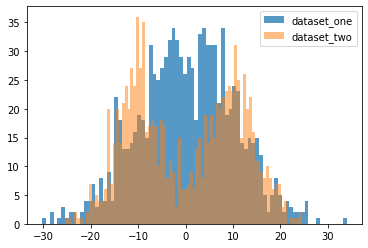

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#from data import dataset_one, dataset_two

plt.hist(dataset_one, alpha =0.75, label = "dataset_one", bins = 80)
plt.hist(dataset_two, alpha = 0.5, label = "dataset_two", bins = 80)
plt.legend()

print("The mean of the first dataset is " + str(np.mean(dataset_one)))
print("The mean of the second dataset is " + str(np.mean(dataset_two)) + "\n")

print("The variance of the first dataset is " + str(np.var(dataset_one)))
print("The variance of the second dataset is " + str(np.var(dataset_two)))

plt.show()


# Variance Recap

When beginning to work with a dataset, one of the first pieces of information you might want to investigate is the spread — is the data close together or far apart? One of the tools in our statistics toolbelt to do this is the descriptive statistic variance:

$\sigma^2 = \frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}$
	 
By finding the variance of a dataset, we can get a numeric representation of the spread of the data. 

But what does that number really mean? How can we use this number to interpret the spread?

It turns out, using variance isn’t necessarily the best statistic to use to describe spread. Luckily, there is another statistic — standard deviation — that can be used instead.

In this lesson, we’ll be working with two datasets. The first dataset contains the heights (in inches) of a random selection of players from the NBA. The second dataset contains the heights (in inches) of a random selection of users on the dating platform OkCupid — let’s hope these users were telling the truth about their height!

In [11]:
okcupid_data = [75.0, 70.0, 68.0, 71.0, 66.0, 67.0, 65.0, 65.0, 67.0, 65.0, 70.0, 72.0, 72.0, 66.0, 62.0, 65.0, 70.0, 64.0, 71.0, 72.0, 67.0, 67.0, 69.0, 71.0, 73.0, 70.0, 72.0, 67.0, 74.0, 68.0, 64.0, 72.0, 67.0, 60.0, 69.0, 69.0, 69.0, 69.0, 63.0, 74.0, 76.0, 72.0, 75.0, 71.0, 66.0, 69.0, 73.0, 70.0, 67.0, 66.0, 66.0, 65.0, 69.0, 69.0, 69.0, 70.0, 71.0, 72.0, 70.0, 71.0, 67.0, 75.0, 70.0, 67.0, 72.0, 68.0, 65.0, 66.0, 69.0, 76.0, 62.0, 67.0, 73.0, 61.0, 72.0, 67.0, 72.0, 65.0, 67.0, 71.0, 67.0, 69.0, 69.0, 64.0, 73.0, 68.0, 66.0, 61.0, 71.0, 64.0, 74.0, 74.0, 67.0, 69.0, 67.0, 78.0, 75.0, 70.0, 66.0, 72.0, 71.0, 68.0, 69.0, 70.0, 63.0, 65.0, 64.0, 72.0, 64.0, 66.0, 68.0, 71.0, 74.0, 66.0, 70.0, 72.0, 68.0, 67.0, 65.0, 66.0, 71.0, 75.0, 66.0, 70.0, 62.0, 68.0, 73.0, 68.0, 71.0, 66.0, 69.0, 68.0, 68.0, 68.0, 68.0, 67.0, 75.0, 73.0, 67.0, 73.0, 62.0, 73.0, 73.0, 74.0, 63.0, 67.0, 70.0, 66.0, 64.0, 67.0, 63.0, 68.0, 68.0, 75.0, 73.0, 61.0, 62.0, 68.0, 69.0, 63.0, 62.0, 66.0, 66.0, 66.0, 72.0, 74.0, 72.0, 63.0, 68.0, 66.0, 66.0, 70.0, 73.0, 63.0, 69.0, 66.0, 68.0, 72.0, 68.0, 71.0, 69.0, 66.0, 68.0, 70.0, 74.0, 63.0, 66.0, 60.0, 67.0, 79.0, 61.0, 69.0, 69.0, 67.0, 71.0, 63.0, 67.0, 63.0, 64.0, 62.0, 65.0, 67.0, 66.0, 63.0, 63.0, 69.0, 71.0, 69.0, 67.0, 66.0, 62.0, 72.0, 69.0, 69.0, 59.0, 74.0, 70.0, 65.0, 70.0, 66.0, 70.0, 64.0, 69.0, 63.0, 62.0, 68.0, 71.0, 71.0, 69.0, 70.0, 72.0, 66.0, 65.0, 65.0, 68.0, 68.0, 62.0, 72.0, 63.0, 73.0, 67.0, 65.0, 69.0, 80.0, 61.0, 63.0, 73.0, 63.0, 71.0, 62.0, 68.0, 72.0, 65.0, 67.0, 67.0, 68.0, 67.0, 67.0, 62.0, 63.0, 64.0, 72.0, 62.0, 66.0, 67.0, 62.0, 69.0, 69.0, 64.0, 62.0, 70.0, 64.0, 63.0, 67.0, 68.0, 67.0, 65.0, 67.0, 64.0, 71.0, 80.0, 60.0, 71.0, 69.0, 67.0, 64.0, 62.0, 63.0, 61.0, 69.0, 76.0, 70.0, 72.0, 63.0, 69.0, 72.0, 70.0, 73.0, 62.0, 62.0, 72.0, 66.0, 65.0, 70.0, 71.0, 71.0, 64.0, 63.0, 75.0, 70.0, 73.0, 68.0, 69.0, 64.0, 68.0, 68.0, 74.0, 61.0, 66.0, 62.0, 67.0, 72.0, 67.0, 64.0, 68.0, 63.0, 69.0, 68.0, 65.0, 66.0, 62.0, 72.0, 70.0, 69.0, 64.0, 63.0, 60.0, 65.0, 67.0, 72.0, 71.0, 73.0, 68.0, 62.0, 69.0, 71.0, 66.0, 72.0, 68.0, 73.0, 67.0, 75.0, 74.0, 74.0, 68.0, 64.0, 75.0, 63.0, 65.0, 72.0, 68.0, 69.0, 73.0, 70.0, 69.0, 73.0, 69.0, 71.0, 73.0, 63.0, 67.0, 64.0, 71.0, 72.0, 74.0, 72.0, 71.0, 64.0, 66.0, 74.0, 68.0, 70.0, 68.0, 76.0, 72.0, 70.0, 67.0, 64.0, 68.0, 66.0, 69.0, 72.0, 61.0, 74.0, 64.0, 66.0, 73.0, 76.0, 71.0, 69.0, 71.0, 71.0, 91.0, 74.0, 62.0, 67.0, 62.0, 71.0, 70.0, 72.0, 72.0, 64.0, 72.0, 68.0, 68.0, 71.0, 66.0, 67.0, 68.0, 61.0, 73.0, 71.0, 71.0, 64.0, 72.0, 67.0, 65.0, 74.0, 68.0, 61.0, 71.0, 67.0, 65.0, 79.0, 61.0, 66.0, 76.0, 69.0, 70.0, 65.0, 72.0, 71.0, 71.0, 62.0, 70.0, 72.0, 70.0, 69.0, 71.0, 70.0, 65.0, 64.0, 68.0, 68.0, 67.0, 64.0, 72.0, 61.0, 64.0, 72.0, 64.0, 70.0, 63.0, 72.0, 66.0, 65.0, 64.0, 65.0, 64.0, 64.0, 63.0, 63.0, 66.0, 70.0, 70.0, 67.0, 70.0, 68.0, 73.0, 64.0, 64.0, 71.0, 71.0, 62.0, 67.0, 67.0, 70.0, 66.0, 72.0, 70.0, 72.0, 66.0, 63.0, 70.0, 71.0, 68.0, 64.0, 70.0, 68.0, 69.0, 74.0, 72.0, 75.0, 65.0, 73.0, 69.0, 62.0, 64.0, 68.0, 70.0, 67.0, 72.0, 69.0, 68.0, 71.0, 72.0, 68.0, 72.0, 75.0, 67.0, 68.0, 67.0, 73.0, 72.0, 76.0, 68.0, 72.0, 67.0, 66.0, 71.0, 69.0, 64.0, 75.0, 69.0, 67.0, 70.0, 71.0, 74.0, 69.0, 68.0, 60.0, 68.0, 70.0, 70.0, 60.0, 67.0, 83.0, 70.0, 59.0, 71.0, 77.0, 69.0, 76.0, 71.0, 68.0, 70.0, 70.0, 62.0, 70.0, 66.0, 72.0, 73.0, 68.0, 72.0, 66.0, 70.0, 68.0, 76.0, 67.0, 68.0, 74.0, 67.0, 60.0, 70.0, 63.0, 68.0, 71.0, 73.0, 72.0, 68.0, 77.0, 73.0, 68.0, 66.0, 65.0, 69.0, 71.0, 61.0, 68.0, 63.0, 63.0, 72.0, 66.0, 64.0, 63.0, 68.0, 69.0, 67.0, 63.0, 74.0, 68.0, 67.0, 67.0, 63.0, 64.0, 67.0, 72.0, 72.0, 65.0, 68.0, 69.0, 69.0, 74.0, 73.0, 72.0, 63.0, 68.0, 68.0, 75.0, 73.0, 68.0, 67.0, 73.0, 64.0, 71.0, 64.0, 63.0, 71.0, 64.0, 74.0, 69.0, 73.0, 71.0, 73.0, 74.0, 68.0, 64.0, 65.0, 74.0, 64.0, 70.0, 75.0, 61.0, 70.0, 70.0, 63.0, 71.0, 62.0, 70.0, 69.0, 68.0, 71.0, 61.0, 69.0, 68.0, 71.0, 71.0, 72.0, 69.0, 66.0, 70.0, 70.0, 73.0, 73.0, 69.0, 67.0, 69.0, 68.0, 67.0, 70.0, 70.0, 62.0, 64.0, 69.0, 68.0, 68.0, 70.0, 68.0, 67.0, 63.0, 66.0, 70.0, 72.0, 70.0, 75.0, 71.0, 63.0, 71.0, 72.0, 76.0, 68.0, 70.0, 73.0, 70.0, 68.0, 67.0, 69.0, 72.0, 74.0, 64.0, 63.0, 67.0, 67.0, 72.0, 74.0, 72.0, 65.0, 62.0, 69.0, 73.0, 70.0, 67.0, 69.0, 72.0, 74.0, 67.0, 72.0, 70.0, 64.0, 74.0, 73.0, 65.0, 70.0, 64.0, 62.0, 64.0, 67.0, 74.0, 67.0, 68.0, 64.0, 73.0, 66.0, 72.0, 69.0, 62.0, 69.0, 75.0, 68.0, 64.0, 70.0, 69.0, 76.0, 73.0, 60.0, 70.0, 64.0, 64.0, 71.0, 68.0, 70.0, 71.0, 69.0, 68.0, 64.0, 72.0, 73.0, 69.0, 69.0, 67.0, 65.0, 69.0, 69.0, 72.0, 68.0, 74.0, 75.0, 68.0, 73.0, 60.0, 73.0, 69.0, 70.0, 68.0, 71.0, 72.0, 71.0, 74.0, 68.0, 68.0, 70.0, 60.0, 70.0, 74.0, 68.0, 72.0, 71.0, 69.0, 69.0, 64.0, 65.0, 76.0, 74.0, 70.0, 70.0, 73.0, 63.0, 71.0, 66.0, 74.0, 69.0, 67.0, 64.0, 73.0, 69.0, 68.0, 72.0, 68.0, 68.0, 68.0, 64.0, 66.0, 64.0, 72.0, 70.0, 65.0, 67.0, 73.0, 76.0, 68.0, 70.0, 71.0, 68.0, 70.0, 72.0, 74.0, 67.0, 70.0, 71.0, 72.0, 68.0, 71.0, 72.0, 70.0, 65.0, 72.0, 68.0, 72.0, 63.0, 69.0, 75.0, 66.0, 72.0, 70.0, 74.0, 72.0, 68.0, 69.0, 65.0, 71.0, 64.0, 72.0, 70.0, 70.0, 69.0, 67.0, 64.0, 68.0, 73.0, 66.0, 61.0, 76.0, 75.0, 72.0, 70.0, 66.0, 69.0, 63.0, 66.0, 68.0, 73.0, 73.0, 64.0, 68.0, 68.0, 67.0, 67.0, 70.0, 63.0, 72.0, 72.0, 67.0, 66.0, 63.0, 73.0, 65.0, 76.0, 66.0, 74.0, 65.0, 71.0, 68.0, 70.0, 62.0, 65.0, 67.0, 64.0, 62.0, 66.0, 70.0, 66.0, 67.0, 72.0, 67.0, 73.0, 65.0, 72.0, 66.0, 67.0, 58.0, 62.0, 69.0, 72.0, 67.0, 70.0, 64.0, 70.0, 66.0, 70.0, 64.0, 70.0, 66.0, 69.0, 73.0, 65.0, 66.0, 72.0, 66.0, 61.0, 67.0, 74.0, 64.0, 74.0, 67.0, 68.0, 70.0, 65.0, 71.0, 64.0, 67.0, 64.0, 66.0, 71.0, 67.0, 73.0, 66.0, 74.0, 67.0, 66.0, 71.0, 69.0, 71.0, 68.0, 61.0, 75.0, 66.0, 74.0, 69.0, 62.0, 65.0, 60.0, 74.0, 68.0, 64.0, 73.0, 64.0, 67.0, 73.0, 66.0, 60.0, 70.0, 69.0, 67.0, 72.0, 71.0, 65.0, 72.0, 65.0, 71.0, 66.0, 69.0, 66.0, 74.0, 73.0, 64.0, 64.0, 70.0, 66.0, 74.0, 66.0, 66.0, 68.0, 61.0, 68.0, 72.0, 72.0, 67.0, 59.0, 68.0, 65.0]

nba_data = [82.0, 81.0, 86.0, 73.0, 78.0, 81.0, 79.0, 75.0, 75.0, 78.0, 77.0, 72.0, 83.0, 78.0, 79.0, 81.0, 78.0, 77.0, 76.0, 77.0, 70.0, 84.0, 79.0, 82.0, 73.0, 79.0, 77.0, 77.0, 78.0, 74.0, 76.0, 79.0, 86.0, 82.0, 71.0, 85.0, 80.0, 81.0, 82.0, 83.0, 83.0, 83.0, 80.0, 73.0, 77.0, 79.0, 80.0, 81.0, 74.0, 80.0, 81.0, 82.0, 76.0, 75.0, 81.0, 74.0, 82.0, 80.0, 77.0, 76.0, 78.0, 78.0, 83.0, 81.0, 78.0, 83.0, 74.0, 82.0, 82.0, 80.0, 81.0, 81.0, 75.0, 82.0, 83.0, 78.0, 74.0, 78.0, 74.0, 82.0, 74.0, 77.0, 75.0, 81.0, 82.0, 80.0, 78.0, 77.0, 78.0, 72.0, 79.0, 81.0, 71.0, 78.0, 82.0, 79.0, 82.0, 78.0, 79.0, 79.0, 86.0, 79.0, 82.0, 79.0, 84.0, 83.0, 79.0, 80.0, 72.0, 81.0, 83.0, 80.0, 73.0, 83.0, 76.0, 83.0, 73.0, 75.0, 80.0, 75.0, 80.0, 76.0, 81.0, 74.0, 80.0, 77.0, 71.0, 72.0, 83.0, 75.0, 77.0, 74.0, 77.0, 74.0, 81.0, 76.0, 79.0, 84.0, 78.0, 79.0, 74.0, 74.0, 71.0, 72.0, 70.0, 80.0, 72.0, 82.0, 82.0, 72.0, 81.0, 81.0, 73.0, 74.0, 82.0, 82.0, 81.0, 77.0, 77.0, 81.0, 84.0, 74.0, 78.0, 75.0, 76.0, 85.0, 72.0, 84.0, 77.0, 81.0, 83.0, 78.0, 81.0, 81.0, 73.0, 73.0, 72.0, 76.0, 83.0, 76.0, 80.0, 80.0, 78.0, 79.0, 76.0, 79.0, 74.0, 82.0, 81.0, 81.0, 78.0, 75.0, 77.0, 72.0, 84.0, 74.0, 83.0, 78.0, 73.0, 78.0, 80.0, 75.0, 80.0, 80.0, 79.0, 76.0, 76.0, 75.0, 73.0, 76.0, 76.0, 75.0, 75.0, 76.0, 70.0, 75.0, 74.0, 84.0, 71.0, 78.0, 77.0, 76.0, 79.0, 77.0, 84.0, 78.0, 77.0, 79.0, 80.0, 80.0, 81.0, 83.0, 76.0, 82.0, 80.0, 83.0, 80.0, 74.0, 78.0, 82.0, 76.0, 80.0, 77.0, 70.0, 80.0, 75.0, 77.0, 78.0, 82.0, 74.0, 77.0, 75.0, 77.0, 81.0, 75.0, 70.0, 77.0, 82.0, 81.0, 77.0, 81.0, 81.0, 72.0, 81.0, 73.0, 76.0, 79.0, 73.0, 79.0, 84.0, 78.0, 81.0, 79.0, 77.0, 75.0, 77.0, 81.0, 77.0, 73.0, 72.0, 83.0, 78.0, 75.0, 76.0, 85.0, 83.0, 80.0, 84.0, 78.0, 80.0, 72.0, 78.0, 79.0, 75.0, 72.0, 79.0, 80.0, 83.0, 82.0, 81.0, 71.0, 80.0, 80.0, 80.0, 80.0, 82.0, 71.0, 71.0, 73.0, 89.0, 74.0, 75.0, 71.0, 73.0, 73.0, 73.0, 83.0, 79.0, 79.0, 81.0, 75.0, 75.0, 80.0, 81.0, 78.0, 78.0, 81.0, 75.0, 75.0, 81.0, 82.0, 85.0, 77.0, 77.0, 81.0, 82.0, 78.0, 78.0, 78.0, 72.0, 76.0, 79.0, 75.0, 76.0, 72.0, 73.0, 76.0, 79.0, 83.0, 72.0, 73.0, 74.0, 81.0, 78.0, 81.0, 84.0, 76.0, 76.0, 72.0, 76.0, 76.0, 84.0, 77.0, 78.0, 80.0, 63.0, 84.0, 81.0, 91.0, 77.0, 81.0, 76.0, 80.0, 74.0, 77.0, 76.0, 77.0, 80.0, 82.0, 82.0, 78.0, 73.0, 80.0, 82.0, 74.0, 83.0, 78.0, 80.0, 81.0, 84.0, 77.0, 80.0, 80.0, 77.0, 83.0, 79.0, 80.0, 81.0, 84.0, 76.0, 82.0, 79.0, 79.0, 80.0, 78.0, 85.0, 82.0, 77.0, 82.0, 77.0, 73.0, 74.0, 77.0, 65.0, 82.0, 78.0, 78.0, 73.0, 82.0, 80.0, 78.0, 78.0, 74.0, 71.0, 77.0, 77.0, 78.0, 80.0, 75.0, 82.0, 90.0, 83.0, 82.0, 80.0, 80.0, 82.0, 79.0, 80.0, 71.0, 77.0, 82.0, 79.0, 73.0, 74.0, 77.0, 79.0, 74.0, 78.0, 75.0, 87.0, 81.0, 76.0, 81.0, 76.0, 79.0, 86.0, 73.0, 81.0, 77.0, 78.0, 74.0, 76.0, 77.0, 79.0, 76.0, 74.0, 84.0, 76.0, 79.0, 76.0, 77.0, 76.0, 76.0, 76.0, 72.0, 78.0, 78.0, 77.0, 79.0, 71.0, 81.0, 79.0, 76.0, 74.0, 79.0, 81.0, 74.0, 73.0, 72.0, 79.0, 77.0, 84.0, 75.0, 78.0, 76.0, 72.0, 76.0, 79.0, 79.0, 79.0, 83.0, 69.0, 75.0, 83.0, 77.0, 75.0, 75.0, 81.0, 75.0, 83.0, 74.0, 80.0, 82.0, 77.0, 83.0, 76.0, 75.0, 77.0, 74.0, 78.0, 82.0, 78.0, 78.0, 72.0, 76.0, 79.0, 73.0, 81.0, 78.0, 81.0, 82.0, 84.0, 81.0, 75.0, 79.0, 78.0, 81.0, 76.0, 75.0, 78.0, 79.0, 77.0, 78.0, 77.0, 82.0, 79.0, 84.0, 78.0, 72.0, 79.0, 80.0, 74.0, 83.0, 73.0, 77.0, 78.0, 73.0, 75.0, 86.0, 75.0, 74.0, 80.0, 75.0, 79.0, 77.0, 80.0, 79.0, 78.0, 80.0, 74.0, 76.0, 80.0, 74.0, 74.0, 79.0, 83.0, 82.0, 80.0, 74.0, 77.0, 79.0, 75.0, 79.0, 84.0, 72.0, 79.0, 79.0, 75.0, 73.0, 83.0, 79.0, 81.0, 80.0, 81.0, 73.0, 78.0, 75.0, 80.0, 82.0, 77.0, 77.0, 75.0, 79.0, 73.0, 73.0, 78.0, 70.0, 72.0, 79.0, 83.0, 83.0, 79.0, 72.0, 76.0, 82.0, 81.0, 79.0, 80.0, 69.0, 77.0, 75.0, 77.0, 77.0, 83.0, 72.0, 75.0, 79.0, 77.0, 81.0, 76.0, 77.0, 75.0, 79.0, 78.0, 75.0, 78.0, 80.0, 84.0, 78.0, 82.0, 73.0, 77.0, 75.0, 76.0, 77.0, 76.0, 77.0, 75.0, 77.0, 78.0, 78.0, 85.0, 80.0, 77.0, 80.0, 80.0, 75.0, 81.0, 81.0, 80.0, 78.0, 83.0, 81.0, 84.0, 84.0, 81.0, 85.0, 78.0, 76.0, 71.0, 72.0, 74.0, 78.0, 85.0, 77.0, 82.0, 82.0, 85.0, 80.0, 77.0, 75.0, 76.0, 78.0, 80.0, 75.0, 79.0, 79.0, 73.0, 75.0, 72.0, 79.0, 82.0, 80.0, 74.0, 75.0, 74.0, 83.0, 82.0, 76.0, 77.0, 82.0, 78.0, 77.0, 81.0, 75.0, 77.0, 74.0, 78.0, 74.0, 76.0, 82.0, 75.0, 83.0, 76.0, 79.0, 77.0, 76.0, 81.0, 76.0, 84.0, 71.0, 75.0, 74.0, 78.0, 78.0, 78.0, 77.0, 87.0, 74.0, 82.0, 79.0, 78.0, 75.0, 84.0, 74.0, 81.0, 82.0, 80.0, 79.0, 80.0, 73.0, 84.0, 76.0, 78.0, 78.0, 76.0, 83.0, 84.0, 74.0, 82.0, 78.0, 71.0, 84.0, 78.0, 72.0, 82.0, 77.0, 72.0, 75.0, 74.0, 80.0, 77.0, 81.0, 77.0, 73.0, 80.0, 75.0, 73.0, 77.0, 82.0, 77.0, 76.0, 76.0, 77.0, 74.0, 81.0, 75.0, 70.0, 81.0, 77.0, 75.0, 82.0, 80.0, 73.0, 74.0, 77.0, 80.0, 75.0, 81.0, 77.0, 73.0, 82.0, 77.0, 82.0, 82.0, 81.0, 78.0, 78.0, 78.0, 72.0, 77.0, 72.0, 83.0, 73.0, 81.0, 73.0, 79.0, 77.0, 79.0, 84.0, 73.0, 80.0, 83.0, 83.0, 73.0, 81.0, 81.0, 74.0, 76.0, 78.0, 78.0, 78.0, 81.0, 76.0, 77.0, 77.0, 76.0, 80.0, 84.0, 75.0, 72.0, 68.0, 70.0, 79.0, 77.0, 76.0, 82.0, 83.0, 76.0, 81.0, 82.0, 81.0, 82.0, 73.0, 73.0, 73.0, 79.0, 77.0, 78.0, 79.0, 81.0, 81.0, 75.0, 78.0, 80.0, 82.0, 76.0, 83.0, 82.0, 72.0, 81.0, 81.0, 72.0, 76.0, 84.0, 75.0, 77.0, 74.0, 75.0, 85.0, 75.0, 84.0, 77.0, 75.0, 83.0, 76.0, 83.0, 72.0, 78.0, 76.0, 80.0, 79.0, 78.0, 81.0, 76.0, 77.0, 77.0, 79.0, 73.0, 79.0, 84.0, 77.0, 82.0, 70.0, 80.0, 84.0, 75.0, 81.0, 82.0, 73.0, 82.0, 82.0, 81.0, 74.0, 75.0, 81.0, 75.0, 79.0, 75.0, 79.0, 79.0, 74.0, 83.0, 83.0, 80.0, 82.0, 76.0, 81.0, 79.0, 77.0, 81.0, 74.0, 80.0, 80.0, 78.0, 79.0, 78.0, 79.0, 75.0, 82.0, 79.0, 83.0, 76.0, 79.0, 78.0, 78.0, 81.0, 80.0, 78.0, 78.0, 80.0, 77.0, 83.0, 74.0, 77.0, 78.0, 81.0, 72.0, 79.0, 78.0, 83.0, 80.0, 77.0, 76.0, 73.0, 78.0, 82.0, 84.0, 80.0, 80.0, 74.0, 75.0, 78.0, 81.0, 76.0, 75.0, 81.0, 78.0, 73.0, 76.0, 78.0, 77.0, 81.0, 75.0, 74.0, 81.0, 80.0, 74.0, 71.0, 82.0, 75.0, 72.0, 79.0, 73.0, 77.0, 78.0, 76.0, 81.0, 80.0, 79.0, 74.0, 72.0, 80.0, 76.0, 77.0, 75.0, 79.0, 73.0, 82.0, 73.0]

## Try to answer the following questions:

- What does it mean for the OkCupid dataset to have a larger variance than the NBA dataset?

- What are the units of the mean? Is someone who is 80 inches tall taller than the average of either group? Which group(s)?

- In this example, the units of variance are inches squared. Can you interpret what it means for the variance of the NBA dataset to be 13.32 inches squared?

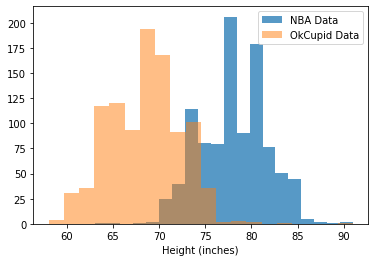

The variance of the NBA dataset is 13.323744000000001
The variance of the OkCupid dataset is 15.400604

The mean of the NBA dataset is 77.984 inches
The mean of the OkCupid dataset is 68.414 inches


In [14]:

import matplotlib.pyplot as plt
import numpy as np


plt.hist(nba_data, alpha = 0.75, label = "NBA Data", bins = 20)
plt.hist(okcupid_data, alpha = 0.5, label = "OkCupid Data", bins = 20)
plt.xlabel("Height (inches)")
plt.legend()
plt.show()

print("The variance of the NBA dataset is " +str(np.var(nba_data)))
print("The variance of the OkCupid dataset is " +str(np.var(okcupid_data)) + "\n")
print("The mean of the NBA dataset is " +str(np.mean(nba_data)) + " inches")
print("The mean of the OkCupid dataset is " +str(np.mean(okcupid_data)) + " inches")

Standard Deviation
Variance is a tricky statistic to use because its units are different from both the mean and the data itself. For example, the mean of our NBA dataset is 77.98 inches. Because of this, we can say someone who is 80 inches tall is about two inches taller than the average NBA player.

However, because the formula for variance includes squaring the difference between the data and the mean, the variance is measured in units squared. This means that the variance for our NBA dataset is 13.32 inches squared.

This result is hard to interpret in context with the mean or the data because their units are different. This is where the statistic standard deviation is useful.

Standard deviation is computed by taking the square root of the variance. sigma is the symbol commonly used for standard deviation. Conveniently, sigma squared is the symbol commonly used for variance:

$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}}$ 

In Python, you can take the square root of a number using ** 0.5:

    num = 25
    num_square_root = num ** 0.5

In [15]:
import numpy as np
#from data import nba_data, okcupid_data

nba_variance = np.var(nba_data)
okcupid_variance = np.var(okcupid_data)

#Change these variables to be the standard deviation of each dataset.
nba_standard_deviation = nba_variance ** 0.5
okcupid_standard_deviation = okcupid_variance ** 0.5

#IGNORE CODE BELOW HERE
print("The standard deviation of the NBA dataset is " +str(nba_standard_deviation))
print("The standard deviation of the OkCupid dataset is " + str(okcupid_standard_deviation))

The standard deviation of the NBA dataset is 3.6501704069810224
The standard deviation of the OkCupid dataset is 3.924360330041063


# Standard Deviation in NumPy

There is a NumPy function dedicated to finding the standard deviation of a dataset — we can cut out the step of first finding the variance. The NumPy function std() takes a dataset as a parameter and returns the standard deviation of that dataset:

    import numpy as np

    dataset = [4, 8, 15, 16, 23, 42]
    standard_deviation = np.std()

In [16]:
import numpy as np
#from data import nba_data, okcupid_data

#Change these variables to be the standard deviation of each dataset. Use NumPy's function!
nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)

#IGNORE CODE BELOW HERE
print("The standard deviation of the NBA dataset is " +str(nba_standard_deviation))
print("The standard deviation of the OkCupid dataset is " + str(okcupid_standard_deviation))

The standard deviation of the NBA dataset is 3.6501704069810224
The standard deviation of the OkCupid dataset is 3.924360330041063


Using Standard Deviation
Now that we’re able to compute the standard deviation of a dataset, what can we do with it?

Now that our units match, our measure of spread is easier to interpret. By finding the number of standard deviations a data point is away from the mean, we can begin to investigate how unusual that datapoint truly is. In fact, you can usually expect around 68% of your data to fall within one standard deviation of the mean, 95% of your data to fall within two standard deviations of the mean, and 99.7% of your data to fall within three standard deviations of the mean.

<img src=images/normal_curve.svg height=400 width=400>

A histogram showing where the standard deviations fallIf you have a data point that is over three standard deviations away from the mean, that's an incredibly unusual piece of data!

# Instructions
1.
Let’s find out how many standard deviations away from the mean NBA great Lebron James is. To begin, let’s find the difference between Lebron’s height (80 inches) and the mean of each dataset.

Set nba_difference equal to 80 minus nba_mean.

Find the difference between Lebron’s height and the OkCupid mean and store it in okcupid_difference. The OkCupid dataset’s mean is stored in okcupid_mean.




2.
We now want to find out how many times the standard deviation goes into those differences.

Set num_nba_deviations equal to nba_difference divided by nba_standard_deviation.

Do a similar calculation for num_okcupid_deviations.

What does that first number tell you about how unusual Lebron James is in the NBA? What does the second number tell you about how unusual Lebron James is in the dating pool?




3.
Let’s check another NBA player. Earl Boykins is one of the smaller NBA players in history at 5’5” (65 inches). Replace Lebron James’ 80 inches with Earl Boykins’ 65.

What can you say about how unusual Earl Boykins is with respect to the two different datasets?

We were surprised that Boykins wasn’t more standard deviations away from the mean of the OkCupid dataset. Think about why he isn’t more of an outlier in this dataset.

In [17]:
import numpy as np

#from data import nba_data, okcupid_data

nba_mean = np.mean(nba_data)
okcupid_mean = np.mean(okcupid_data)

nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)

#Step 1: Calcualte the difference between the player's height and the means
nba_difference = 65 - nba_mean
okcupid_difference = 65 - okcupid_mean

#Step 2: Use the difference between the point and the mean to find how many standard deviations the player is away from the mean.

num_nba_deviations = nba_difference/nba_standard_deviation
num_okcupid_deviations = okcupid_difference/okcupid_standard_deviation


#IGNORE CODE BELOW HERE
print("Your basketball player is " + str(num_nba_deviations) + " standard deviations away from the mean of NBA player heights\n")
print("Your basketball player is " + str(num_okcupid_deviations) + " standard deviations away from the mean of OkCupid profile heights")

Your basketball player is -3.5570942044699723 standard deviations away from the mean of NBA player heights

Your basketball player is -0.8699506958792131 standard deviations away from the mean of OkCupid profile heights


# Review
In the last exercise you saw that Lebron James was 0.55 standard deviations above the mean of NBA player heights. He’s taller than average, but compared to the other NBA players, he’s not absurdly tall.

However, compared to the OkCupid dating pool, he is extremely rare! He’s almost three full standard deviations above the mean. You’d expect only about 0.15% of people on OkCupid to be more than 3 standard deviations away from the mean.

This is the power of standard deviation. By taking the square root of the variance, the standard deviation gives you a statistic about spread that can be easily interpreted and compared to the mean.

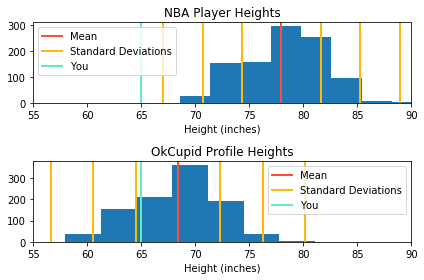

In [20]:

import matplotlib.pyplot as plt
import numpy as np
#from data import nba_data, okcupid_data

nba_mean = np.mean(nba_data)
okcupid_mean = np.mean(okcupid_data)

#Change this variable to your height (in inches)!
your_height = 65

nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)

plt.subplot(211)
plt.title("NBA Player Heights")
plt.xlabel("Height (inches)")

plt.hist(nba_data)

plt.axvline(nba_mean, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

plt.axvline(nba_mean + nba_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
plt.axvline(nba_mean - nba_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(nba_mean + nba_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(nba_mean - nba_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(nba_mean + nba_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(nba_mean - nba_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(your_height, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

plt.xlim(55, 90)
plt.legend()


plt.subplot(212)
plt.title("OkCupid Profile Heights")
plt.xlabel("Height (inches)")

plt.hist(okcupid_data)

plt.axvline(okcupid_mean, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

plt.axvline(okcupid_mean + okcupid_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
plt.axvline(okcupid_mean - okcupid_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(okcupid_mean + okcupid_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(okcupid_mean - okcupid_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(okcupid_mean + okcupid_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(okcupid_mean - okcupid_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(your_height, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

plt.xlim(55, 90)
plt.legend()




plt.tight_layout()
plt.show()
